In [9]:
#importing the necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the json file
with open('XENO_kb.json') as f:
    XENO_kb=json.load(f)

In [4]:
xeno=pd.DataFrame(XENO_kb)
xeno

,id,question,source,owner,section,tag,content
0,AD0001,How to remove withdraw lock,FAQs,Advisory,Building your financial discipline,Lock,1. Please send us an email at uganda@myxeno.co...
1,AD0002,How can I set up my XENO Autosave using my MoM...,FAQs,Advisory,Building your financial discipline,Autosave_MoMo,1. Please see how to automate your savings her...
2,AD0003,How can I set up my XENO Autosave using my web...,FAQs,Advisory,Building your financial discipline,Autosave_Web,1. Please login to your account using Login - ...
3,AD0004,How to I begin my investment journey?,FAQs,Advisory,Setting up my investment account,Goal-based investing,"1. At XENO, we offer both investment advisory ..."
4,AD0005,How is the interest for xeno calculated and wh...,FAQs,Advisory,Understanding the return on your XENO Investment,Returns,1. We specialize in creating customized portfo...
5,AD0006,Can I withdraw using my MTN MoMo menu?,FAQs,Advisory,Liquidation of investment assets,Withdraw_MoMo,1. Yes you can!\n2. Follow the simple steps be...
6,AD0007,Can I withdraw using my XENO web dashboard?,FAQs,Advisory,Liquidation of investment assets,Withdraw_Web,1. Yes you can!\n2. Log in to your XENO accoun...
7,AD0008,Can I withdraw using my XENO App?,FAQs,Advisory,Liquidation of investment assets,Withdraw_App,1. Yes you can!\n2. Login into the App.\n3. Se...
8,AD0009,I deposited my money automatically but it is n...,FAQs,Advisory,Deposit of funds,Deposit,1. Kindly note;\n2. We take three working days...
9,AD0010,Can I edit my phone number using my XENO web d...,FAQs,Advisory,Edit phone number,Contact_edit,1. Yes you can! Please follow the below steps ...


In [7]:
#Number of questions per category
qns_per_section=xeno['section'].value_counts()
print(qns_per_section)

section
Building your financial discipline                  3
Liquidation of investment assets                    3
Edit phone number                                   2
Setting up my investment account                    1
Understanding the return on your XENO Investment    1
Deposit of funds                                    1
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29300\803880732.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xeno.section,rotation=75)


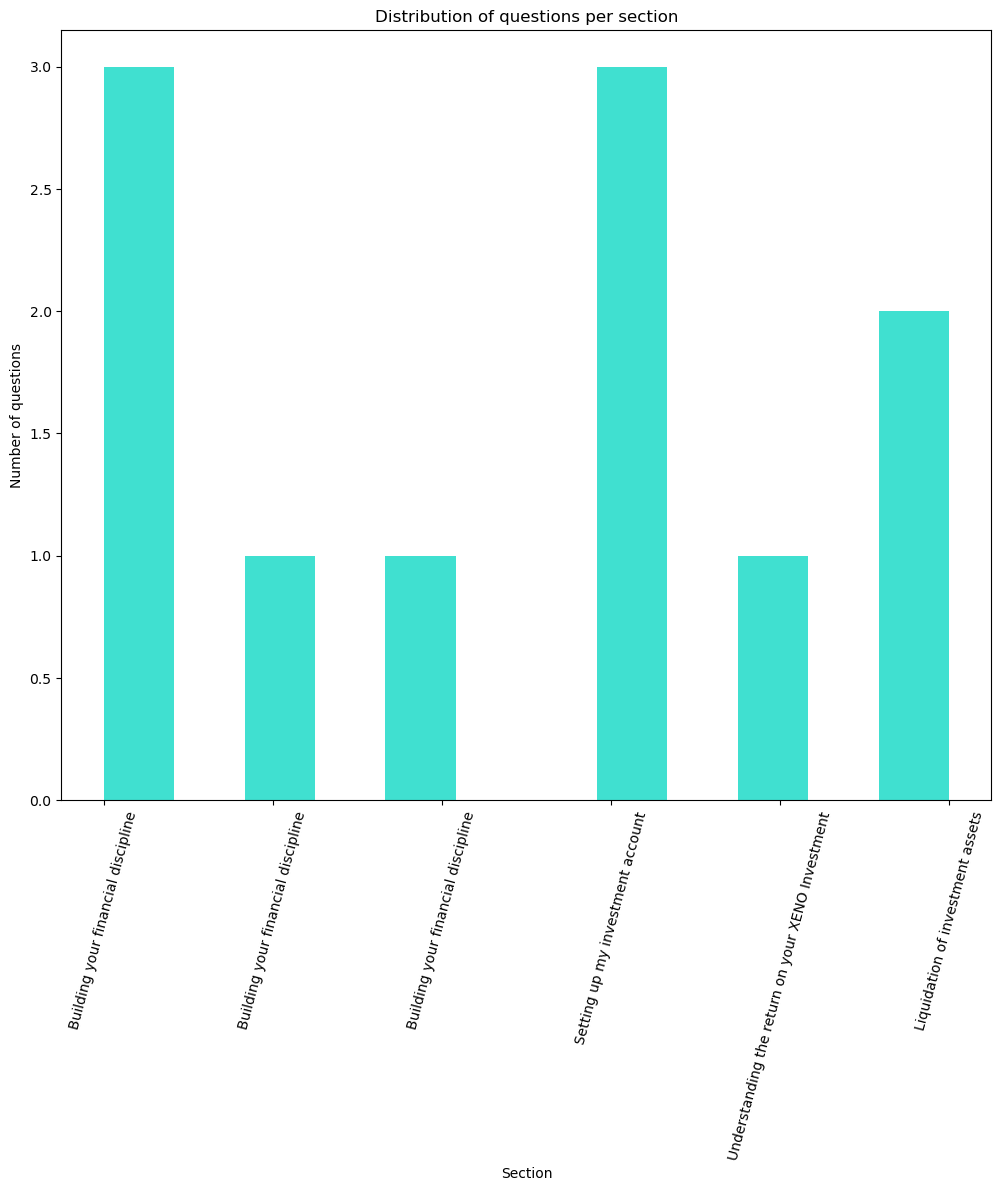

In [23]:
fig,ax=plt.subplots(figsize=(12,10))
ax.hist(xeno['section'], label='Questions per section',color='turquoise', bins=12)
ax.set_xlabel('Section')
ax.set_ylabel('Number of questions')
ax.set_title('Distribution of questions per section')
ax.set_xticklabels(xeno.section,rotation=75)
plt.show()

In [25]:
#Question length in characters
xeno['character_length']=xeno['question'].str.len()
xeno.head()

,id,question,source,owner,section,tag,content,character_length
0,AD0001,How to remove withdraw lock,FAQs,Advisory,Building your financial discipline,Lock,1. Please send us an email at uganda@myxeno.co...,28
1,AD0002,How can I set up my XENO Autosave using my MoM...,FAQs,Advisory,Building your financial discipline,Autosave_MoMo,1. Please see how to automate your savings her...,53
2,AD0003,How can I set up my XENO Autosave using my web...,FAQs,Advisory,Building your financial discipline,Autosave_Web,1. Please login to your account using Login - ...,57
3,AD0004,How to I begin my investment journey?,FAQs,Advisory,Setting up my investment account,Goal-based investing,"1. At XENO, we offer both investment advisory ...",37
4,AD0005,How is the interest for xeno calculated and wh...,FAQs,Advisory,Understanding the return on your XENO Investment,Returns,1. We specialize in creating customized portfo...,81


In [28]:
#Question length in words
xeno['word_count']=xeno['question'].str.split().str.len()
xeno.head()

,id,question,source,owner,section,tag,content,character_length,word_count
0,AD0001,How to remove withdraw lock,FAQs,Advisory,Building your financial discipline,Lock,1. Please send us an email at uganda@myxeno.co...,28,5
1,AD0002,How can I set up my XENO Autosave using my MoM...,FAQs,Advisory,Building your financial discipline,Autosave_MoMo,1. Please see how to automate your savings her...,53,12
2,AD0003,How can I set up my XENO Autosave using my web...,FAQs,Advisory,Building your financial discipline,Autosave_Web,1. Please login to your account using Login - ...,57,12
3,AD0004,How to I begin my investment journey?,FAQs,Advisory,Setting up my investment account,Goal-based investing,"1. At XENO, we offer both investment advisory ...",37,7
4,AD0005,How is the interest for xeno calculated and wh...,FAQs,Advisory,Understanding the return on your XENO Investment,Returns,1. We specialize in creating customized portfo...,81,14


In [30]:
#tokenizing the questions
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [ ]:

xeno['tokenized_qns'] = xeno['question'].apply(word_tokenize)

In [52]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [39]:
my_string="How can I deactivate my very new XENO account?"
pattern=r"([A-Za-z]\w+)"
trial=regexp_tokenize(my_string,pattern)
trial


['How', 'can', 'deactivate', 'my', 'very', 'new', 'XENO', 'account']

In [42]:
lines="Another youthful work, the Protrepticus (“Exhortation”), has been reconstructed by modern scholars from quotations in various works from late antiquity. Everyone must do philosophy, Aristotle claims, because even arguing against the practice of philosophy is itself a form of philosophizing. The best form of philosophy is the contemplation of the universe of nature; it is for this purpose that God made human beings and gave them a godlike intellect. All else—strength, beauty, power, and honour—is worthless."
pattern=r"([A-Za-z]\w+)"
trial2=regexp_tokenize(lines,pattern)
trial2

['Another',
 'youthful',
 'work',
 'the',
 'Protrepticus',
 'Exhortation',
 'has',
 'been',
 'reconstructed',
 'by',
 'modern',
 'scholars',
 'from',
 'quotations',
 'in',
 'various',
 'works',
 'from',
 'late',
 'antiquity',
 'Everyone',
 'must',
 'do',
 'philosophy',
 'Aristotle',
 'claims',
 'because',
 'even',
 'arguing',
 'against',
 'the',
 'practice',
 'of',
 'philosophy',
 'is',
 'itself',
 'form',
 'of',
 'philosophizing',
 'The',
 'best',
 'form',
 'of',
 'philosophy',
 'is',
 'the',
 'contemplation',
 'of',
 'the',
 'universe',
 'of',
 'nature',
 'it',
 'is',
 'for',
 'this',
 'purpose',
 'that',
 'God',
 'made',
 'human',
 'beings',
 'and',
 'gave',
 'them',
 'godlike',
 'intellect',
 'All',
 'else',
 'strength',
 'beauty',
 'power',
 'and',
 'honour',
 'is',
 'worthless']

In [49]:
pattern=r"([A-Za-z]+)"
xeno['question_tokens'] = xeno['question'].apply(lambda q: regexp_tokenize(q, pattern))
xeno['question_tokens']


0                     [How, to, remove, withdraw, lock]
1     [How, can, I, set, up, my, XENO, Autosave, usi...
2     [How, can, I, set, up, my, XENO, Autosave, usi...
3          [How, to, I, begin, my, investment, journey]
4     [How, is, the, interest, for, xeno, calculated...
5        [Can, I, withdraw, using, my, MTN, MoMo, menu]
6     [Can, I, withdraw, using, my, XENO, web, dashb...
7              [Can, I, withdraw, using, my, XENO, App]
8     [I, deposited, my, money, automatically, but, ...
9     [Can, I, edit, my, phone, number, using, my, X...
10    [Can, I, edit, my, phone, number, using, my, X...
Name: question_tokens, dtype: object

In [ ]:
pattern2= r"[A-Za-z]+(?:['-][A-Za-z]+)*|[\w\.-]+@[\w\.-]+\.\w+"
xeno['content_tokens'] = xeno['content'].apply(lambda c: regexp_tokenize(c, pattern))
xeno['content_tokens']

0     [Please, send, us, an, email, at, uganda, myxe...
1     [Please, see, how, to, automate, your, savings...
2     [Please, login, to, your, account, using, Logi...
3     [At, XENO, we, offer, both, investment, adviso...
4     [We, specialize, in, creating, customized, por...
5     [Yes, you, can, Follow, the, simple, steps, be...
6     [Yes, you, can, Log, in, to, your, XENO, accou...
7     [Yes, you, can, Login, into, the, App, Select,...
8     [Kindly, note, We, take, three, working, days,...
9     [Yes, you, can, Please, follow, the, below, st...
10    [Yes, you, can, Please, follow, the, below, st...
Name: content_tokens, dtype: object

In [51]:
xeno['content_tokens'][2]

['Please',
 'login',
 'to',
 'your',
 'account',
 'using',
 'Login',
 'XENO',
 'myxeno',
 'com',
 'Navigate',
 'to',
 'the',
 'top',
 'right',
 'corner',
 'of',
 'your',
 'home',
 'page',
 'Select',
 'Setup',
 'AutoSave']

In [55]:
from nltk.corpus import stopwords

# Make sure you have the stop words downloaded (only needs to be done once)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [57]:
stop_words = set(stopwords.words('english'))

# Remove stop words from tokenized questions
xeno['no_stops'] = xeno['question_tokens'].apply(lambda q: [word for word in q if word.lower() not in stop_words])
xeno['no_stops']

0                              [remove, withdraw, lock]
1              [set, XENO, Autosave, using, MoMo, menu]
2          [set, XENO, Autosave, using, web, dashboard]
3                          [begin, investment, journey]
4     [interest, xeno, calculated, duration, Increment]
5                    [withdraw, using, MTN, MoMo, menu]
6               [withdraw, using, XENO, web, dashboard]
7                          [withdraw, using, XENO, App]
8     [deposited, money, automatically, reflecting, ...
9     [edit, phone, number, using, XENO, web, dashbo...
10              [edit, phone, number, using, XENO, App]
Name: no_stops, dtype: object

In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary(xeno['no_stops'])  #create a gensim dictionary
cleaned_qns = [dictionary.doc2bow(qn) for qn in xeno['no_stops']] #this creates a bag of words
cleaned_qns                         #that returns a list of list of tuples where each tuple is
                                    # a word_id assigned by the dictionary and the latter the number
                                    #of times it appears in the question/document


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (5, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(2, 1), (4, 1), (6, 1), (8, 1), (19, 1)],
 [(2, 1), (5, 1), (8, 1), (9, 1), (10, 1)],
 [(2, 1), (5, 1), (8, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1)],
 [(5, 1), (8, 1), (9, 1), (10, 1), (26, 1), (27, 1), (28, 1)],
 [(5, 1), (8, 1), (20, 1), (26, 1), (27, 1), (28, 1)]]

In [63]:
from gensim.models import TfidfModel  #converts the bag of words into weighted TF-IDF vectors
tfidf_model = TfidfModel(cleaned_qns) #creates and trains a model using the bag of words. it learns TF and IDF of each word
tfidf_corpus = tfidf_model[cleaned_qns] #applies the trained model on your bag of words to get the TF-IDF vectors
 

In [64]:
tfidf_corpus

In [68]:
import numpy as np
import gensim

In [69]:
dense_corpus = [gensim.matutils.corpus2dense([doc], num_terms=len(dictionary)).T[0] for doc in tfidf_corpus]

In [61]:
xeno.head()

,id,question,source,owner,section,tag,content,character_length,word_count,regex_tokens,question_tokens,content_tokens,no_stops
0,AD0001,How to remove withdraw lock,FAQs,Advisory,Building your financial discipline,Lock,1. Please send us an email at uganda@myxeno.co...,28,5,"[How, to, remove, withdraw, lock]","[How, to, remove, withdraw, lock]","[Please, send, us, an, email, at, uganda, myxe...","[remove, withdraw, lock]"
1,AD0002,How can I set up my XENO Autosave using my MoM...,FAQs,Advisory,Building your financial discipline,Autosave_MoMo,1. Please see how to automate your savings her...,53,12,"[How, can, I, set, up, my, XENO, Autosave, usi...","[How, can, I, set, up, my, XENO, Autosave, usi...","[Please, see, how, to, automate, your, savings...","[set, XENO, Autosave, using, MoMo, menu]"
2,AD0003,How can I set up my XENO Autosave using my web...,FAQs,Advisory,Building your financial discipline,Autosave_Web,1. Please login to your account using Login - ...,57,12,"[How, can, I, set, up, my, XENO, Autosave, usi...","[How, can, I, set, up, my, XENO, Autosave, usi...","[Please, login, to, your, account, using, Logi...","[set, XENO, Autosave, using, web, dashboard]"
3,AD0004,How to I begin my investment journey?,FAQs,Advisory,Setting up my investment account,Goal-based investing,"1. At XENO, we offer both investment advisory ...",37,7,"[How, to, I, begin, my, investment, journey]","[How, to, I, begin, my, investment, journey]","[At, XENO, we, offer, both, investment, adviso...","[begin, investment, journey]"
4,AD0005,How is the interest for xeno calculated and wh...,FAQs,Advisory,Understanding the return on your XENO Investment,Returns,1. We specialize in creating customized portfo...,81,14,"[How, is, the, interest, for, xeno, calculated...","[How, is, the, interest, for, xeno, calculated...","[We, specialize, in, creating, customized, por...","[interest, xeno, calculated, duration, Increment]"


In [ ]:
lambda q : print(f"{q} is a girl") #q is the argument your passing and the other part is
#the function that is being called

<function __main__.<lambda>(q)>